# Notebook para Desafio Spike Abril 2021
### Autor: Matias Moreno
### Mail: matias.moreno@sansano.usm.cl

# 1. Datos: Precipitaciones, Indicadores Económicos Banco Central 
* Cargar archivo precipitaciones.csv con las precipitaciones medias mensuales registradas entre enero 1979 y abril 2020. (Unidad: mm).
* Cargar archivo banco_central.csv con variables económicas.

In [3]:
# Common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [396]:
# Import data
rain = pd.read_csv("data/precipitaciones.csv")
economy = pd.read_csv("data/banco_central.csv")

# 2. Análisis de datos. Creación de variables
## 2.a) Realiza un análisis exploratorio de la base de datos, ¿Qué puedes decir de los datos, sus distribuciones, valores faltantes, otros? ¿Hay algo que te llame la atención?

### Dataset Precipitaciones

Primero vamos a analizar las columnas, tipos, valores y distribucion de los datos para el dataset de precipitaciones

In [397]:
rain.head()

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1989-02-01,0.719033,0.117045,0.028272,0.0,0.724667,9.172945,22.595834,52.268010
1,1998-10-01,0.065216,0.000000,0.011493,0.0,0.008968,2.089674,14.702087,45.142041
2,2001-02-01,2.030026,0.047987,0.002634,0.0,0.032163,10.768351,29.465057,65.571098
3,2008-11-01,0.622784,0.000000,0.015872,0.0,1.734168,25.083557,64.901645,113.093488
4,2009-04-01,0.008065,0.000000,0.009396,0.0,12.080715,56.233424,96.364235,155.622235


In [398]:
rain.dtypes

date                                    object
Coquimbo                               float64
Valparaiso                             float64
Metropolitana_de_Santiago              float64
Libertador_Gral__Bernardo_O_Higgins    float64
Maule                                  float64
Biobio                                 float64
La_Araucania                           float64
Los_Rios                               float64
dtype: object

Se observa que todos los datos estan en flotantes, excepto las fechas, no se observa un orden particular de las filas

In [399]:
rain.isnull().sum()

date                                   0
Coquimbo                               0
Valparaiso                             0
Metropolitana_de_Santiago              0
Libertador_Gral__Bernardo_O_Higgins    0
Maule                                  0
Biobio                                 0
La_Araucania                           0
Los_Rios                               0
dtype: int64

No existen datos faltantes en el dataset de precipitaciones

In [400]:
rain.describe()

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,16.154691,32.450980,49.666682,72.249805,98.662773,128.113406,151.486456,199.451789
std,32.629286,55.434330,74.361099,101.426112,122.766771,130.056094,126.628503,140.073615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001170,0.005331,0.748127
25%,0.821521,1.538162,5.297546,5.343992,11.897363,29.356684,52.930343,89.805643
50%,4.071036,9.037825,19.087592,25.995969,45.649888,79.558557,110.570990,159.467940
75%,16.137600,38.409213,63.408364,101.875093,142.230716,184.751307,208.316243,274.594590
max,347.133889,441.048604,524.592667,645.515752,759.177712,702.434707,661.211203,717.735673


A simple vista se observa que hay regiones, como La_Araucania y Los_Rios que tienen precipitaciones mucho mayores que el resto de las regiones

### Dataset Economia

Vamos a analizar las columnas, tipos, valores y distribucion de los datos para el dataset de variables economicas

In [401]:
economy.head()

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,...,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,...,867.806.065,968.087.179,914.276.663,NaN,104.545.429,544.815.032,NaN,NaN,NaN,32206.0
2,2013-05-01 00:00:00 UTC,101.642.954,993.959.922,96.133.164,105.445.361,968.789.055,100.462.117,104.083.216,101.953.299,102.322.796,...,878.030.947,978.471.874,966.913.278,NaN,99.468.801,56.891.916,NaN,NaN,NaN,31589.0
3,2013-06-01 00:00:00 UTC,998.310.201,968.367.884,102.400.933,999.212.106,89.190.493,939.504.414,103.857.161,100.222.381,995.139.235,...,913.180.348,966.647.135,981.820.974,NaN,94.969.678,56.594.867,NaN,NaN,NaN,28457.0
4,2013-07-01 00:00:00 UTC,964.696.194,961.051.418,980.029.022,100.882.112,901.785.886,92.776.599,969.309.272,962.069.134,962.804.305,...,909.263.447,100.100.749,990.198.382,NaN,102.128.977,586.329.899,NaN,NaN,NaN,31736.0


In [402]:
type(economy.Imacec_empalmado[0])

str

In [403]:
economy.dtypes

Periodo                                             object
Imacec_empalmado                                    object
Imacec_produccion_de_bienes                         object
Imacec_minero                                       object
Imacec_industria                                    object
                                                    ...   
Generacion_de_energia_electrica_CDEC_GWh            object
Indice_de_ventas_comercio_real_IVCM                 object
Indice_de_ventas_comercio_real_no_durables_IVCM     object
Indice_de_ventas_comercio_real_durables_IVCM        object
Ventas_autos_nuevos                                float64
Length: 85, dtype: object

In [404]:
economy.dtypes.value_counts()

object     77
float64     8
dtype: int64

El formato de la fecha del dataset de enocomia tiene un formato distinto que el formato del dataset de precipitaciones. Se deberá realizar una conversion para hacer correlaciones.
77 de 85 series de datos son tipo objetos, en donde hay varios datos de tipo string, se deberá relizar una limpieza para tratar estos datos matematicamente.

In [405]:
economy.isnull().sum()

Periodo                                              0
Imacec_empalmado                                   314
Imacec_produccion_de_bienes                        314
Imacec_minero                                      314
Imacec_industria                                   313
                                                  ... 
Generacion_de_energia_electrica_CDEC_GWh           350
Indice_de_ventas_comercio_real_IVCM                530
Indice_de_ventas_comercio_real_no_durables_IVCM    530
Indice_de_ventas_comercio_real_durables_IVCM       529
Ventas_autos_nuevos                                469
Length: 85, dtype: int64

Existen muchos datos faltantes en cada columna, se debera tratar estos datos para que no afecten a los futuros modelos.

## 2.b) Realiza una limpieza de datos para que las series de tiempo no tengan duplicados ni valores incorrectos.

### Primero analizaremos las series de tiempo del dataset de precipitaciones

In [406]:
rain["date"].is_unique 

True

No se tienen valores duplicados

Revisaremos que todas las fechas esten entre enero del 1970
y abril del 2020

In [407]:
rain["date"].sort_values()

170    1979-01-01
465    1979-02-01
305    1979-03-01
441    1979-04-01
217    1979-05-01
          ...    
410    2019-12-01
38     2020-01-01
166    2020-02-01
7      2020-03-01
144    2020-04-01
Name: date, Length: 496, dtype: object

Finalmente revisar si todos los meses corresponden a valores entre 1 y 12. Y el día corresponde al primero de cada mes

In [408]:
for date in rain["date"]:
    ano, mes, dia = date.split("-")
    if int(mes) < 1 or int(mes) > 12:
        print("Error, fecha {}, tiene mes incorrecto".format(date))
    if int(dia) != 1:
        print("Error, fecha {}, tiene dia incorrecto".format(date))

### Pasar fecha a valor tipo datetime

In [409]:
rain['date'] =  pd.to_datetime(rain['date'], format='%Y-%m-%d')
rain['date'].head()

0   1989-02-01
1   1998-10-01
2   2001-02-01
3   2008-11-01
4   2009-04-01
Name: date, dtype: datetime64[ns]

### Analizaremos las series de tiempo del dataset de variables economicas

In [410]:
economy["Periodo"].is_unique

False

Existen valores duplicados, vamos a revisar

In [411]:
economy["Periodo"][economy["Periodo"].duplicated()]

66    2018-08-01 00:00:00 UTC
79    2019-08-01 00:00:00 UTC
Name: Periodo, dtype: object

In [412]:
for i in range(economy["Periodo"].size):
    if economy["Periodo"][i] == "2018-08-01 00:00:00 UTC" or economy["Periodo"][i] == "2019-08-01 00:00:00 UTC":
        print(i, economy["Periodo"][i])

65 2018-08-01 00:00:00 UTC
66 2018-08-01 00:00:00 UTC
78 2019-08-01 00:00:00 UTC
79 2019-08-01 00:00:00 UTC


In [413]:
row65 = economy[65:66].values
row66 = economy[66:67].values
for i in range(len(row65)):
    if row65[0][i] != row66[0][i]:
        print("distintos")

In [414]:
row78 = economy[78:79].values
row79 = economy[79:80].values
for i in range(len(row65)):
    if row78[0][i] != row79[0][i]:
        print("distintos")

Las filas 65 y 66 son iguales, lo mismo para las 78 y 79, se procede a borrar una de cada grupo.

In [415]:
economy = economy.drop([66, 79])

In [416]:
economy.shape[0]

612

Se redujo en dos filas nuestro dataset

Vamos a analizar el format de las fechas del dataset

In [420]:
for date in economy["Periodo"]:
    fecha, _, _ = date.split(" ")
    ano, mes, dia = fecha.split("-")
    #print(ano, dia, mes)
    if int(mes) < 1 or int(mes) > 12:
        print("Error, fecha {}, tiene mes incorrecto".format(date))
    if int(dia) < 1 or int(dia) > 31:
        print("Error, fecha {}, tiene dia incorrecto".format(date))

Hay una fecha con mes incorrecto 13, podria ser un error de tipeo y se quizo ingresar el mes 12.
Veamos si ya existe el registro de la fecha 2020-12-01

In [418]:
for date in economy["Periodo"]:
    fecha, _, _ = date.split(" ")
    ano, mes, dia = fecha.split("-")
    if ano == "2020" and mes == "12":
        print("Si existe la fecha")

Al parecer no existe esa fecha, vamos a corregirla

In [419]:
economy['Periodo'] = np.where(economy['Periodo'] == "2020-13-01 00:00:00 UTC", "2020-12-01 00:00:00 UTC", economy['Periodo'])

In [421]:
for date in economy["Periodo"]:
    fecha, _, _ = date.split(" ")
    ano, mes, dia = fecha.split("-")
    #print(ano, dia, mes)
    if int(mes) < 1 or int(mes) > 12:
        print("Error, fecha {}, tiene mes incorrecto".format(date))
    if int(dia) != 1:
        print("Error, fecha {}, tiene dia incorrecto".format(date))

Fecha corregida!

### Ahora vamos a modificar el formato de fecha para que coincidan con los dos datasets

In [422]:
def fecha_format(value):
    fecha, _, _ = value.split(" ")
    
    return fecha

economy["Periodo"] = economy["Periodo"].apply(lambda x: fecha_format(x))
economy["Periodo"].head()

0    2013-03-01
1    2013-04-01
2    2013-05-01
3    2013-06-01
4    2013-07-01
Name: Periodo, dtype: object

In [423]:
economy['Periodo'] =  pd.to_datetime(economy['Periodo'], format='%Y-%m-%d')

### Vamos a pasar las columnas con valores en string, en formato de miles 100.000.000 a numeros flotantes

In [424]:
columns_obj = economy.select_dtypes(include=['object']).columns
columns_obj = columns[1:]

In [425]:
columns_obj

Index(['Imacec_produccion_de_bienes', 'Imacec_minero', 'Imacec_industria',
       'Imacec_resto_de_bienes', 'Imacec_comercio', 'Imacec_servicios',
       'Imacec_a_costo_de_factores', 'Imacec_no_minero',
       'PIB_Agropecuario_silvicola', 'PIB_Pesca', 'PIB_Mineria',
       'PIB_Mineria_del_cobre', 'PIB_Otras_actividades_mineras',
       'PIB_Industria_Manufacturera', 'PIB_Alimentos', 'PIB_Bebidas_y_tabaco',
       'PIB_Textil', 'PIB_Maderas_y_muebles', 'PIB_Celulosa',
       'PIB_Refinacion_de_petroleo', 'PIB_Quimica',
       'PIB_Minerales_no_metalicos_y_metalica_basica',
       'PIB_Productos_metalicos', 'PIB_Electricidad', 'PIB_Construccion',
       'PIB_Comercio', 'PIB_Restaurantes_y_hoteles', 'PIB_Transporte',
       'PIB_Comunicaciones', 'PIB_Servicios_financieros',
       'PIB_Servicios_empresariales', 'PIB_Servicios_de_vivienda',
       'PIB_Servicios_personales', 'PIB_Administracion_publica',
       'PIB_a_costo_de_factores', 'Impuesto_al_valor_agregado',
       'Derechos_de

In [426]:
def pesos_to_float(value):
    # nan case
    if type(value) == float:
        return value
    if type(value) == str:
        new = value.replace(".","")
        try:
            new_float = float(new)
        except:
            print("An exception occurred with value", new)
            return -1
        return new_float
    
for col in columns:
    economy[col] = economy[col].apply(lambda x: pesos_to_float(x))
    print(economy[col].dtype)
    

float64
float64
float64
An exception occurred with value a
float64
float64
float64
float64
float64
float64
An exception occurred with value a
float64
float64
float64
float64
float64
An exception occurred with value a
An exception occurred with value a
An exception occurred with value a
An exception occurred with value a
float64
float64
float64
float64
float64
float64
float64
An exception occurred with value a
An exception occurred with value a
An exception occurred with value a
float64
An exception occurred with value a
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
An exception occurred with value a
float64
float64
float64
float64
float64
An exception occurred with value a
float64
float64
float64
float64
float64
An exception occurred with value a
An exception occurred with value a
An exception occurred with value a
An exception occurr

In [427]:
economy.dtypes.value_counts()

float64           84
datetime64[ns]     1
dtype: int64

Se convirtieron los valores en string a float. Existen algunos errores con valores igual a "a". En estos casos se guardó el valor como -1 para posteriores modificaciones si fueran necesarias.

# 3. Visualización

## 3.a) Crea una función que permita graficar series históricas de precipitaciones para un rango de fechas determinado. Para esto la función debe recibir como argumentos el nombre de una región, fecha de inicio y fecha de término (asegúrate de verificar en tu función que tanto el nombre de la región como las fechas ingresadas existan en el dataset).

In [221]:
rain.head()

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1989-02-01,0.719033,0.117045,0.028272,0.0,0.724667,9.172945,22.595834,52.268010
1,1998-10-01,0.065216,0.000000,0.011493,0.0,0.008968,2.089674,14.702087,45.142041
2,2001-02-01,2.030026,0.047987,0.002634,0.0,0.032163,10.768351,29.465057,65.571098
3,2008-11-01,0.622784,0.000000,0.015872,0.0,1.734168,25.083557,64.901645,113.093488
4,2009-04-01,0.008065,0.000000,0.009396,0.0,12.080715,56.233424,96.364235,155.622235


In [259]:
regiones = ["Coquimbo",
            "Valparaiso",
            "Metropolitana_de_Santiago",
            "Libertador_Gral__Bernardo_O_Higgins",
            "Maule",
            "Biobio",
            "La_Araucania",
            "Los_Rios",
           ]
def precipitaciones_hist(region, inicio, fin):
    if region in regiones:
        series = rain[["date", region]][(rain["date"] > inicio) & (rain["date"] < fin)]
        # Si existe uno o mas datos en las fechas ingresadas, se considera como correcto el input
        if series.shape[0] > 1:
            series.plot(y=region, x='date')

### 3.b) Usa esta función para graficar las precipitaciones para la Región Libertador General Bernardo O'Higgins y para la Región Metropolitana entre las fechas 2000-01-01 y 2020-01-01. ¿ Qué observas con respecto a estacionalidades y tendencias?

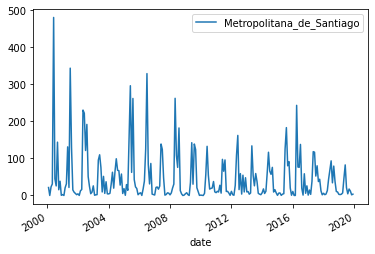

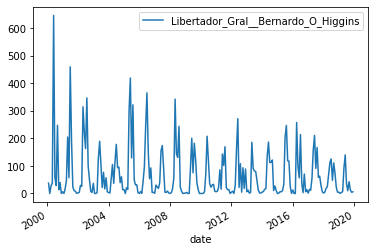

In [262]:
precipitaciones_hist("Metropolitana_de_Santiago", "2000-01-01", "2020-01-01")
precipitaciones_hist("Libertador_Gral__Bernardo_O_Higgins", "2000-01-01", "2020-01-01")

Se observa un comportamiento ciclico de las precipitaciones, en donde en los meses invernales precipita la mayor cantidad de agua del año. Se observa una clara tendencia a la baja en el promedio de precipitaciones.

### Crea una función que, para una región, grafique múltiples series de tiempo mensuales de precipitaciones, donde cada serie de tiempo corresponda a un año. La función debe recibir como argumento una lista con los años que queremos graficar (2000, 2005,..) y el nombre de la región. El eje X debe indicar los meses (enero, febrero, etc…). 
* Usa esta función para graficar las precipitaciones para la Región del Maule durante los años 1982, 1992, 2002, 2012 y 2019.
* ¿Qué puedes concluir de estos gráficos?

In [428]:
# Ordenar Rain por fechas
rain = rain.sort_values("date")

In [429]:
def multiple_year_plot(years, region):
    joined = pd.DataFrame({'month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})
    
    for year in years:
        yearStr = str(year)
        series = rain[["date", region]][(pd.DatetimeIndex(rain["date"]).year == year)]
        series["month"] = pd.DatetimeIndex(series["date"]).month
        series = series.rename(columns={region: yearStr})
        joined = pd.merge(joined, series[["month", yearStr]], on="month")
        plt.plot(joined["month"], joined[yearStr], label = yearStr)
        
    plt.legend()
    plt.show()

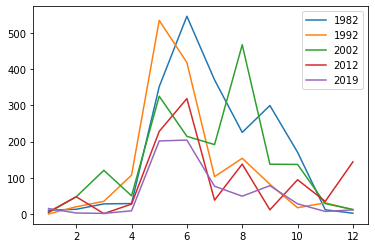

In [430]:
multiple_year_plot([1982, 1992, 2002, 2012, 2019], "Maule")

Se puede ver un decrecimiento en los valores máximos de precipitaciones y en los promedios. Es decir, cada vez llueve menos en la región.

### Crea una función que permita visualizar dos series históricas de PIB para un rango de fechas determinado. Para esto la función debe recibir como input el nombre de cada serie, fecha de inicio y fecha de término. Grafica las series de tiempo del PIB agropecuario y silvícola y la del PIB de Servicios financieros desde el 2013-01-01 hasta la fecha más reciente en que haya datos.
* ¿Qué puedes decir de cada serie en particular?
* ¿Hay alguna relación entre estas dos series?

In [431]:
# Ordenar variables economicas por fechas
economy = economy.sort_values("Periodo")
economy.columns

Index(['Periodo', 'Imacec_empalmado', 'Imacec_produccion_de_bienes',
       'Imacec_minero', 'Imacec_industria', 'Imacec_resto_de_bienes',
       'Imacec_comercio', 'Imacec_servicios', 'Imacec_a_costo_de_factores',
       'Imacec_no_minero', 'PIB_Agropecuario_silvicola', 'PIB_Pesca',
       'PIB_Mineria', 'PIB_Mineria_del_cobre', 'PIB_Otras_actividades_mineras',
       'PIB_Industria_Manufacturera', 'PIB_Alimentos', 'PIB_Bebidas_y_tabaco',
       'PIB_Textil', 'PIB_Maderas_y_muebles', 'PIB_Celulosa',
       'PIB_Refinacion_de_petroleo', 'PIB_Quimica',
       'PIB_Minerales_no_metalicos_y_metalica_basica',
       'PIB_Productos_metalicos', 'PIB_Electricidad', 'PIB_Construccion',
       'PIB_Comercio', 'PIB_Restaurantes_y_hoteles', 'PIB_Transporte',
       'PIB_Comunicaciones', 'PIB_Servicios_financieros',
       'PIB_Servicios_empresariales', 'PIB_Servicios_de_vivienda',
       'PIB_Servicios_personales', 'PIB_Administracion_publica',
       'PIB_a_costo_de_factores', 'Impuesto_al_valor

In [334]:
def two_series_plot(s1, s2, inicio, fin):
    series1 = economy[["Periodo", s1]][(economy["Periodo"] > inicio) & (economy["Periodo"] < fin)]
    series2 = economy[["Periodo", s2]][(economy["Periodo"] > inicio) & (economy["Periodo"] < fin)]
    
    plt.plot(series1["Periodo"], series1[s1], label = s1)
    plt.plot(series2["Periodo"], series2[s2], label = s2)
        
    plt.legend()
    plt.show()

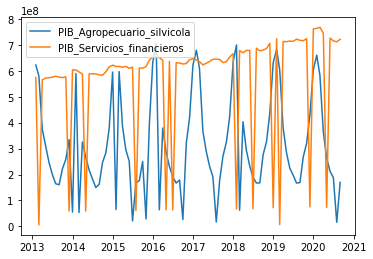

In [335]:
two_series_plot("PIB_Agropecuario_silvicola", "PIB_Servicios_financieros", "2013-01-01", "2022-01-01")

* Sobre la serie agropecuaria silvicola, se observa una comportamiento ciclico estacional, en donde existe un aumento significativo en la temporada de verano, probablemente por el periodo normal de cosecha de frutas y otros cultivos.
* Sobre la serie financiera, se mantiene en un crecimiento constante desde el 2013, con algunas fuertes bajas una o dos veces al año
* En varios meses donde se encuentra el peak de pib agropecuario, el pib se servicios financieros baja considerablemente, como se puede ver en los veranos-otoños de 2012, 2014, 2016, 2018, 2019 y 2020.

# 4. Tratamiento y creación de variables 
### ¿Cómo podríamos evaluar la correlación entre las distintas series de tiempo y cómo se tienen que correlacionar para entrenar un modelo? ¿Mucha correlación, no correlacionadas, da igual?

Se puede calcular la correlación matematica entre los valores de las distintas series de tiempo. Existen varios metodos distintos para calcular correlaciones entre variables. En general se busca una media o alta correlación positiva o negativa entre las variables, para considerar que dos variables son dependientes.

### Para el entrenamiento del modelo, queremos predecir el precio de la leche para el productor en Chile. Para eso, descarga el archivo precio_leche.csv y haz un merge con las bases de datos de precipitaciones y datos del Banco Central.
* Este archivo tiene una columna de año, mes y precio_leche (que corresponde al precio nominal, sin IVA, en pesos chilenos por litro), por lo que vas a tener que crear la columna de fecha que calce con la de las otras bases.

In [432]:
milk = pd.read_csv("data/precio_leche.csv")

In [433]:
def mes_to_month(x):
    if x == "Ene":
        return "01"
    if x == "Feb":
        return "02"
    if x == "Mar":
        return "03"
    if x == "Abr":
        return "04"
    if x == "May":
        return "05"
    if x == "Jun":
        return "06"
    if x == "Jul":
        return "07"
    if x == "Ago":
        return "08"
    if x == "Sep":
        return "09"
    if x == "Oct":
        return "10"
    if x == "Nov":
        return "11"
    if x == "Dic":
        return "12"
    else:
        print("Error en mes!")

In [434]:
milk["Anio_str"] = milk["Anio"].apply(lambda x: str(x))
milk["month"] = milk["Mes"].apply(lambda x: mes_to_month(x))
result = milk['Anio_str'] + milk['Mes']
result.head()

milk["Anio_str"] = milk["Anio"].apply(lambda x: str(x))
milk["month"] = milk["Mes"].apply(lambda x: mes_to_month(x))
milk["date"] = milk["Anio_str"] + "-" + milk["month"] + "-01"
milk["date"] =  pd.to_datetime(milk['date'], format='%Y-%m-%d')
milk.head()

,Anio,Mes,Precio_leche,Anio_str,month,date
0,1979,Ene,3.85,1979,01,1979-01-01
1,1979,Feb,4.58,1979,02,1979-02-01
2,1979,Mar,5.18,1979,03,1979-03-01
3,1979,Abr,6.06,1979,04,1979-04-01
4,1979,May,7.25,1979,05,1979-05-01


In [435]:
milk = milk.drop(['Anio', 'Mes', 'Anio_str', 'month'], axis=1)
milk.head()

,Precio_leche,date
0,3.85,1979-01-01
1,4.58,1979-02-01
2,5.18,1979-03-01
3,6.06,1979-04-01
4,7.25,1979-05-01


In [436]:
economy = economy.rename(columns={"Periodo": "date"})
economy.columns

Index(['date', 'Imacec_empalmado', 'Imacec_produccion_de_bienes',
       'Imacec_minero', 'Imacec_industria', 'Imacec_resto_de_bienes',
       'Imacec_comercio', 'Imacec_servicios', 'Imacec_a_costo_de_factores',
       'Imacec_no_minero', 'PIB_Agropecuario_silvicola', 'PIB_Pesca',
       'PIB_Mineria', 'PIB_Mineria_del_cobre', 'PIB_Otras_actividades_mineras',
       'PIB_Industria_Manufacturera', 'PIB_Alimentos', 'PIB_Bebidas_y_tabaco',
       'PIB_Textil', 'PIB_Maderas_y_muebles', 'PIB_Celulosa',
       'PIB_Refinacion_de_petroleo', 'PIB_Quimica',
       'PIB_Minerales_no_metalicos_y_metalica_basica',
       'PIB_Productos_metalicos', 'PIB_Electricidad', 'PIB_Construccion',
       'PIB_Comercio', 'PIB_Restaurantes_y_hoteles', 'PIB_Transporte',
       'PIB_Comunicaciones', 'PIB_Servicios_financieros',
       'PIB_Servicios_empresariales', 'PIB_Servicios_de_vivienda',
       'PIB_Servicios_personales', 'PIB_Administracion_publica',
       'PIB_a_costo_de_factores', 'Impuesto_al_valor_ag

In [441]:
rain.columns

Index(['date', 'Coquimbo', 'Valparaiso', 'Metropolitana_de_Santiago',
       'Libertador_Gral__Bernardo_O_Higgins', 'Maule', 'Biobio',
       'La_Araucania', 'Los_Rios'],
      dtype='object')

In [439]:
economy[400:500].head()

,date,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
546,2003-05-01,638738093.0,772528284.0,96947158.0,768981947.0,610333255.0,458972457.0,597628213.0,654868522.0,595354682.0,...,106493039.0,NaN,813267858.0,NaN,755779172.0,37899406.0,NaN,NaN,NaN,NaN
547,2003-06-01,624746984.0,738367483.0,989538172.0,730850363.0,565038482.0,43454941.0,597755276.0,640695912.0,580509068.0,...,108379938.0,NaN,839475886.0,NaN,738219916.0,370635622.0,NaN,NaN,NaN,NaN
548,2003-07-01,610097033.0,748750449.0,100781887.0,760479368.0,547965229.0,430570947.0,560772704.0,622290279.0,565083704.0,...,106847781.0,NaN,851760899.0,NaN,780654724.0,389794153.0,NaN,NaN,NaN,NaN
549,2003-08-01,613857271.0,706808702.0,899979996.0,7334262.0,517492661.0,423220975.0,59531186.0,627531297.0,573550187.0,...,105997218.0,NaN,792792837.0,NaN,769680196.0,379246493.0,NaN,NaN,NaN,NaN
550,2003-09-01,601932775.0,687746887.0,938063009.0,701432855.0,495224445.0,42377516.0,580878325.0,613037551.0,559980619.0,...,102298444.0,NaN,798525843.0,NaN,734561741.0,362298612.0,NaN,NaN,NaN,NaN


In [442]:
merge = pd.merge(milk, economy[economy.columns], on="date")
merge = pd.merge(merge, rain[rain.columns], on="date")
merge.head()

,Precio_leche,date,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,...,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,3.85,1979-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.641948,0.587062,2.447114,1.608992,3.736215,17.859634,25.212940,45.596447
1,4.58,1979-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.179804,2.432192,3.997852,4.346310,16.347637,17.680612,18.085072,34.075039
2,5.18,1979-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.255490,0.020601,0.000000,0.055488,0.545324,14.435698,28.696504,66.232248
3,6.06,1979-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.173699,11.745779,13.722349,12.989194,21.880607,39.136483,43.617921,73.548127
4,7.25,1979-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.039098,18.609286,50.187148,104.451550,143.914334,219.729235,279.409718,438.005116


### Crea las variables:
* A partir de la variable fecha, crea nuevas variables para el año, mes, trimestre.
* Lags y estadísticas acumuladas (por ejemplo: promedio, varianza) de las variables que consideres relevantes.

# 5. Modelo 

### Entrena un modelo que permita predecir el precio de la leche el próximo mes, en función de los datos entregados.
* Si necesitas crear variables adicionales que pueden aportar información al modelo, tienes total libertad.

### ¿Qué datos adicionales te gustaría tener?¿Qué datos son necesarios para que este modelo funcione/mejore las métricas?

### ¿Cómo evalúas el resultado del modelo?¿Qué métricas tiene sentido mirar?

### ¿Para qué aplicaciones puede servir un modelo de este tipo? En particular, ¿Cómo podría ayudar a combatir el cambio climático?

Un modelo de predicción de precio de productos podría ayudar a los consumidores a planificar de mejor forma su consumo de productos. El aumento del consumo de cualquier producto fuera de su "estación natural", como es el caso de leche, frutas y algunas verduras, requieren de una mayor cantidad de inversión y trabajo en la producción, y por lo tanto, una mayor cantidad de emisión de CO2. Si el consumo se concentrara en los productos de temporada, mejorarían los precios para los consumidores y este incentivo disminuiría nuestras emisiones para ayudar a combatir el rápido efecto del cambio climatico.